## First Simple Model

This notebook is concerning the First Simple Model as a proof of concept and an initial prediction of the data.


In [12]:
# Standard Imports
import numpy as np

# Importing all relevant packages for modeling in keras
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Import packages for showing the performance metrics
from sklearn.metrics import confusion_matrix

# Importing local functions
from src import eval_plots

# Setting the random seed for reproducability
np.random.seed(123)

### Initializing the paths to the data directories.

In [5]:
train_folder = './data/split/train/'

test_folder = './data/split/test/'

val_folder = './data/split/validation/'


### Setting up the Image Data Flow

In [6]:
# set up batch generator for train set with 1000 as the batch size
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size=(100, 100), 
        batch_size = 32)

# set up batch generator for test set with 1000 as the batch size
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(100, 100), 
        batch_size = 32) 

# set up batch generator for validation set with 1000 as the batch size
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(100, 100), 
        batch_size = 32)


Found 166520 images belonging to 2 classes.
Found 55504 images belonging to 2 classes.
Found 55500 images belonging to 2 classes.


### Initializing Early stopping and model checkpoints

In [7]:
# Creating admin tools for the models like automatic saving checkpoints, early stopping routines, etc.
checkpoint = ModelCheckpoint("./trained_models/fsm.h5",
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True,
                             save_weights_only=False,
                             mode='auto',
                             period=1)

early = EarlyStopping(monitor='val_acc',
                      min_delta=0,
                      patience=4,
                      verbose=1,
                      mode='auto')



### Define the First Simple Model

- The FSM is a simple model with 4 convolutional layers and accompanying pooling layers. Adam is used as the optimizer with a lerning rate of 1e-4.

In [8]:
def first_simple():
    
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(100, 100, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(2, activation='sigmoid'))    
    
    opt = Adam(lr=0.0001)
    model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['acc'])
    
    print(model.summary())
    return model

### Displaying the model summary and running the model using 100 epochs and a low ````steps_per_epoch```` count to ensure the model runs.

In [11]:
# set the model as the first simple model
model = first_simple()

# Fit the model to the train data
history = model.fit(train_generator,
                    epochs=100,
#                     steps_per_epoch=10,
                    validation_data=val_generator,
                    callbacks=[checkpoint,early],
                    )#class_weight=weights

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 128)        

KeyboardInterrupt: 

## Evaluating the Model

- The accuracy is taking for the test set.
- The accuracy curve and loss curve are analyzed to ensure weights are learned
- Predictions are made on the test set and a confusion matrix is plotted along with recall, precision, accuracy, and f1-score to determine performance

In [2]:
# Test results of the Model on train data 
loss_train,accuracy_train = model.evaluate(val_generator)
print('Model has an accuracy of {} with a loss of {} on the train subset.'.format(accuracy_train,loss_train ))

NameError: name 'model' is not defined

In [164]:
# Test results of the Model on test data
loss_test,accuracy_test = model.evaluate(test_generator)
print('Model has an accuracy of {} with a loss of {} on the test subset.'.format(accuracy_test,loss_test))

1735/1735 [==============================] - 25s 14ms/step - loss: 0.5844 - acc: 0.7264
Model has an accuracy of 0.7263801097869873 with a loss of 0.5844181776046753 on the test subset.


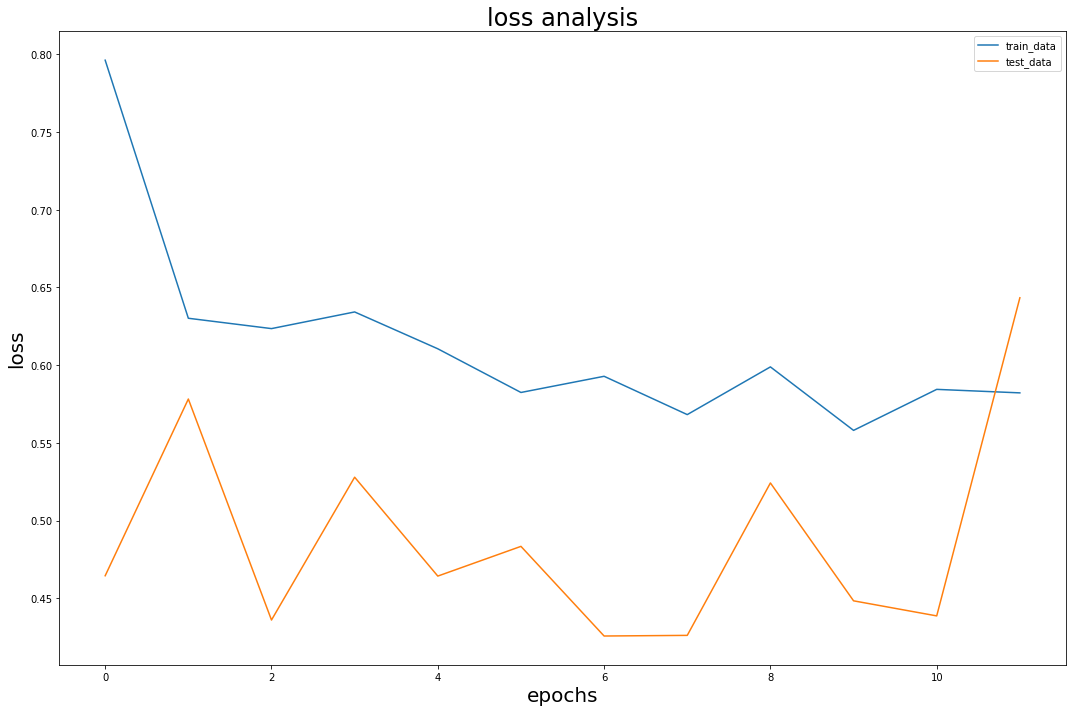

In [165]:
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_xlabel('epochs', size = 20)
ax.set_ylabel('loss', size = 20)
ax.legend(['train_data','test_data'])
ax.set_title('loss analysis',size = 24)
plt.tight_layout()
fig.savefig('effNetB0_loss.png')

plt.show()

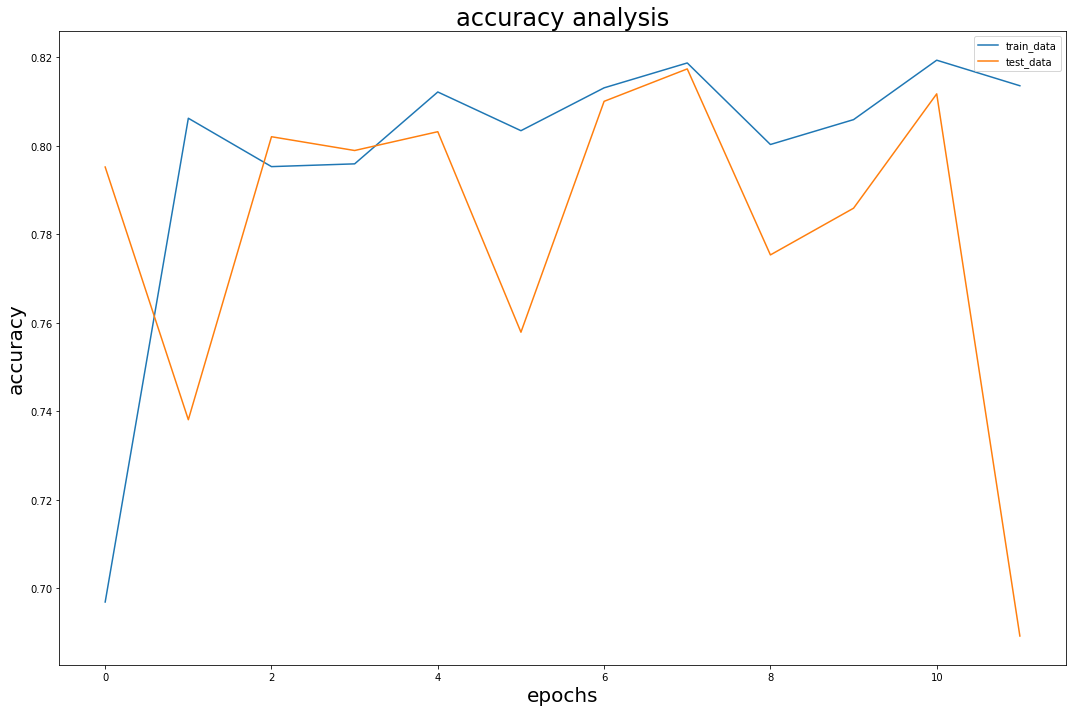

In [166]:
fig,ax = plt.subplots(figsize=(15,10))

ax.plot(history.history['acc'])
ax.plot(history.history['val_acc'])
ax.set_xlabel('epochs',size = 20)
ax.set_ylabel('accuracy',size = 20)
ax.legend(['train_data','test_data'])
ax.set_title('accuracy analysis',size = 24)
plt.tight_layout()
fig.savefig('effNetB0_acc.png')
plt.show()

In [169]:
model.predict(test_generator)

array([[0.15581864, 0.83723956],
       [0.10082308, 0.8930737 ],
       [0.07699058, 0.9207874 ],
       ...,
       [0.5129179 , 0.49375516],
       [0.20288092, 0.794462  ],
       [0.87930673, 0.12254521]], dtype=float32)

In [170]:
y_labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [171]:
y_predicts = np.argmin(model.predict(test_generator),axis=1)
y_labels  = test_generator.labels

In [172]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

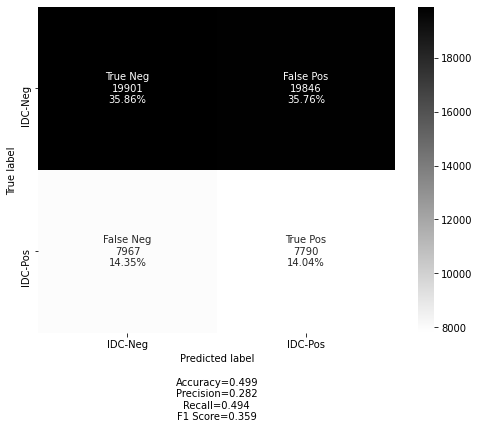

In [173]:
cf_matrix = confusion_matrix(y_labels,y_predicts)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['IDC-Neg', 'IDC-Pos']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary',
                      figsize=(8,6))

#### The Accuracy is lower than indicated in the modeling. The above metrics seem correct as the data has a large imballance in favor of IDC-negative. A model that would give a negative prediction would be correct about 66% of the time.